## Create Lagrange Basis Polynomial Functionality

In [1]:
using Plots
pyplot()
default(guidefont = font(17), tickfont = font(15), legendfont = font(12), titlefont = font(20))


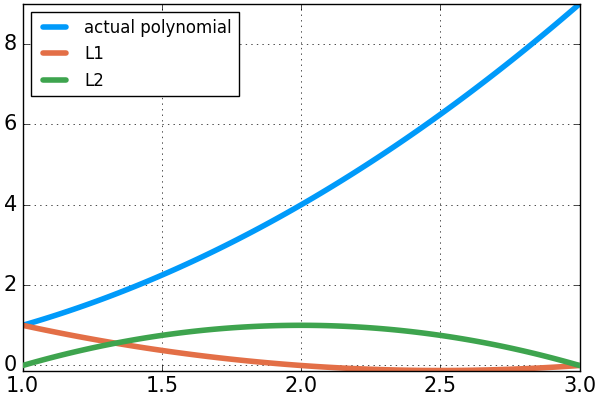

/home/febbo/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [2]:
"""
L = lagrange_basis_poly{T<:Number}(x::Float64,x_data::AbstractArray{T},idx::Int64,N::Int64)
--------------------------------------------------------------------------------------\n
Author: Huckleberry Febbo, Graduate Student, University of Michigan
Date Create: 12/26/2016, Last Modified: 12/26/2016
Citations: This function was influenced by the lagrange() function [located here](https://github.com/pjabardo/Jacobi.jl/blob/master/src/gauss_quad.jl)
--------------------------------------------------------------------------------------\n
# Input Arguments
* `x`: point to approximate function value at
* `x_data`: x data to used calculate basis polynomials
* `N`: order of Lagrange interpolating polynomial
* `idx`: index of interest

# Output Arguments
* `L`: Lagrange basis polynomials

A basic description of Lagrange interpolating polynomials is provided [here](http://127.0.0.1:8000/lagrange_poly.html#lagrange-poly)

"""
function lagrange_basis_poly(x,x_data,N,idx)
    L = 1;
    for j in 1:N+1 # use all of the data
      if j!=idx
        L = L*(x - x_data[j])/(x_data[idx]-x_data[j]);
      end
    end
  return L
end

# example, interpolate f(x) = x^2 over 1<=x<=3 given
x_data = [1,2,3];
y_data = [1,4,9];
x0 = 1; xf = 3;
ns = 100;  # plotting points
x = Array(linspace(x0,xf,ns));
y = x.^2;
plot(x,y, label= "actual polynomial",w=4)

N = length(x_data)-1; # order of Lagrange Polynomial
if N > length(x_data) -1
  error("Maximum N value = length(x_data)-1")
end
L = zeros(Float64,N+1,ns);
for idx in 1:N+1
  for j in 1:ns
    L[idx,j] = lagrange_basis_poly(x[j],x_data,N,idx)
  end
end
plot!(x,L[1,:],label="L1",w=4)
plot!(x,L[2,:],label="L2",w=4)

# Approximate Function Using Basis Polynomials


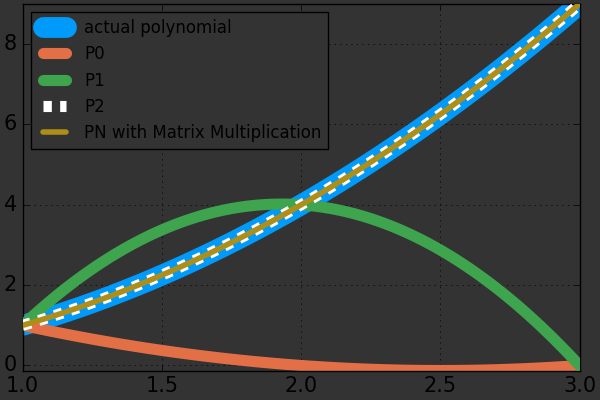

In [3]:
P = zeros(Float64,N+1,ns)
for idx in 1:N+1  
    if idx==1
        P[idx,:] = y_data[idx]*L[idx,:]
    else
        P[idx,:] = y_data[idx]*L[idx,:] + P[idx-1,:]
    end
end
P2=y_data'*L

plot(x,y,label= "actual polynomial",w=15)
plot!(x,P[1,:],w=8,label="P0")
plot!(x,P[2,:],w=8,label="P1")
plot!(x,P[3,:],line=(8,:dash,:white),label="P2")
plot!(x,P2',w=4,label="PN with Matrix Multiplication",background_color=RGB(0.2,0.2,0.2))

Notice how matrix multiplication directly gives the result.

# Create Additional Function Method To Opperate on an Array of x's

In [4]:
function lagrange_basis_poly!{T<:Number}(x::AbstractArray{T},x_data,N,L::AbstractArray{T})
   if N > length(x_data) -1
      error("Maximum N value = length(x_data)-1")
    end
    ns = length(x);
    L = zeros(Float64,N+1,ns);
    for idx in 1:N+1
      for j in 1:ns
        L[idx,j] = lagrange_basis_poly(x[j],x_data,N,idx)
      end
    end
    return L
end

lagrange_basis_poly{T<:Number}(x::AbstractArray{T},x_data,N) = lagrange_basis_poly!(x::AbstractArray{T},x_data,N,zeros(x))

lagrange_basis_poly (generic function with 2 methods)

In [11]:
lagrange_basis_poly(x,x_data,N)

3×100 Array{Float64,2}:
  1.0   0.969901     0.94021     0.910927   …  -0.0193858  -0.00989695   0.0
  0.0   0.0399959    0.0791756   0.117539       0.0791756   0.0399959   -0.0
 -0.0  -0.00989695  -0.0193858  -0.0284665      0.94021     0.969901     1.0

In [6]:
L

3×100 Array{Float64,2}:
  1.0   0.969901     0.94021     0.910927   …  -0.0193858  -0.00989695   0.0
  0.0   0.0399959    0.0791756   0.117539       0.0791756   0.0399959   -0.0
 -0.0  -0.00989695  -0.0193858  -0.0284665      0.94021     0.969901     1.0

So, our new method is matching. Thus, the higher-level functionality is working.

In [13]:
function interpolate_lagrange{T<:Number}(x::AbstractArray{T},x_data,y_data,N)
    if N > length(x_data) -1
      error("Maximum N value = length(x_data)-1")
    end
    ns = length(x);
    L = zeros(Float64,N+1,ns);
    x = x[:]; x_data = x_data[:]; y_data = y_data[:]; # make sure data is in a column
    for idx in 1:N+1
      for j in 1:ns
        L[idx,j] = lagrange_basis_poly(x[j],x_data,N,idx)
      end
    end
    y = y_data'*L;
    return y
end

interpolate_lagrange (generic function with 1 method)

In [15]:
interpolate_lagrange(x,x_data,y_data,N)

1×100 Array{Float64,2}:
 1.0  1.04081  1.08244  1.12489  1.16815  …  8.64004  8.75921  8.8792  9.0

In [16]:
P2

1×100 Array{Float64,2}:
 1.0  1.04081  1.08244  1.12489  1.16815  …  8.64004  8.75921  8.8792  9.0

Working as expected